## Customizing Colorbars

Plot legends identify discrete labels of discrete points. For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool. In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot. We'll start by setting up the notebook for plotting and importing the functions we will use:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

As we have seen several times throughout this section, the simplest colorbar can be created with the `plt.colorbar` function:

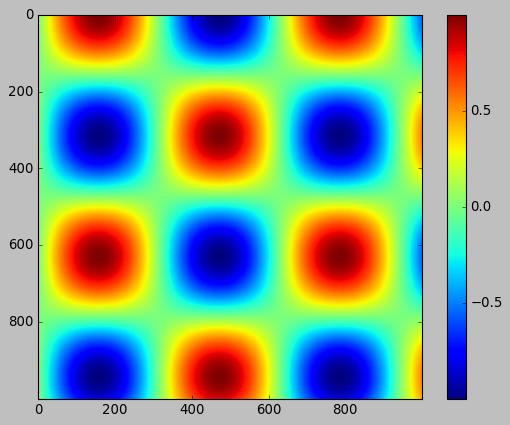

In [4]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

The colormap can be specified using the `cmap` argument to the plotting function that is creating the visualization:

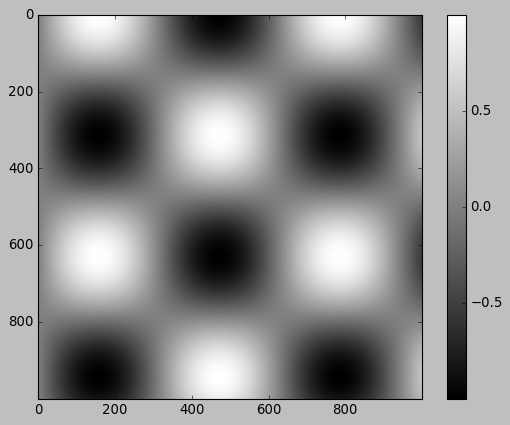

In [5]:
plt.imshow(I, cmap='gray')
plt.colorbar()

### Color Limits and Extensions

Matplotlib allows for a large range of colorbar customization. The colorbar itself is simply an instance of `plt.Axes`, so all of the axes and tick formatting tricks we've learned are applicable. The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the `extend` property. This might come in handy, for example, if displaying an image that is subject to noise:

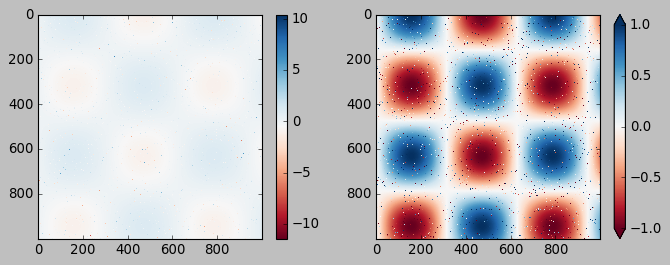

In [4]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes out the pattern we are interested in. In the right panel, we manually set the color limits and add extensions to indicate values which are above or below those limits. The result is a much more useful visualization of our data.

### Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values. The easiest way to do this is to use the `plt.cm.get_cmap()` function and pass the name of a suitable colormap along with the number of desired bins:

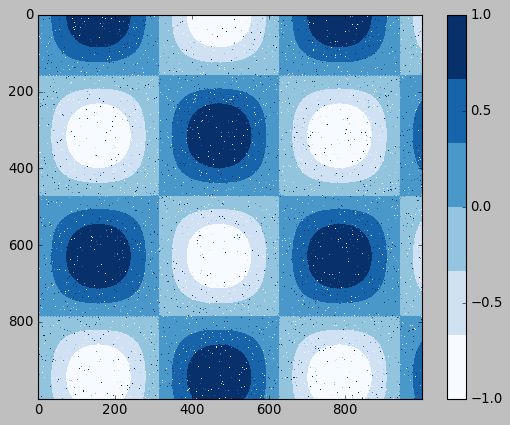

In [5]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

The discrete version of a colormap can be used just like any other colormap.